In [ ]:
import pandas as pd
#import bamboolib
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

import seaborn as sns
import scipy
import scipy.cluster.hierarchy as hc
import scipy.spatial as sp


# Chargement des données

In [2]:
current_directory = os.getcwd()
print(current_directory)

if 'aymeric' in current_directory:
    path_base = "/home/aymeric/python-scripts/anses_medialab/datas/" #aymeric
elif 'Mac' in current_directory:
    path_base = '~/Dropbox/Mac/Desktop/CRD Anses/all3/' # Jean Philippe
else:
    path_base = "andrei"

df_sim = pd.read_csv(f'{path_base}similarity_facebook_4.csv', sep = "\t", index_col = 0)
#df_sim = pd.read_csv(f'{path_base}similarity_facebook_5.csv', sep = "\t", index_col = 0)
df_sim

/home/aymeric/python-scripts/anses_medialab/analyse_tweets


,abeilles,agriculteur,alimentation,aliments,alternatives,alternatives aux pesticides,animal,apiculteur,campagne,cancers,...,salariés,santé,scientifiques,stéphane le foll,syndrome,systèmes,traitements,travail,écologique,études
abeilles,1.000000,0.047434,0.027599,0.015615,0.019989,0.006680,0.020002,0.458162,0.095511,0.002786,...,0.000000,0.056710,0.196225,0.213205,0.237073,0.015012,0.045414,0.134375,0.041412,0.102823
agriculteur,0.047434,1.000000,0.053367,0.029296,0.040739,0.018058,0.050162,0.022740,0.096321,0.059164,...,0.032184,0.117791,0.045345,0.039413,0.001431,0.115794,0.035506,0.078641,0.067961,0.052392
alimentation,0.027599,0.053367,1.000000,0.432935,0.113307,0.016052,0.046742,0.018230,0.049731,0.157653,...,0.002774,0.316101,0.077126,0.001099,0.004069,0.130334,0.018035,0.151069,0.039407,0.083579
aliments,0.015615,0.029296,0.432935,1.000000,0.044836,0.000000,0.143513,0.003649,0.016175,0.191742,...,0.000956,0.260402,0.106822,0.000758,0.000000,0.090623,0.027360,0.053587,0.015894,0.143384
alternatives,0.019989,0.040739,0.113307,0.044836,1.000000,0.865239,0.024931,0.010789,0.040167,0.028729,...,0.000000,0.052135,0.015102,0.005761,0.015998,0.101000,0.043592,0.034263,0.070152,0.018914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
systèmes,0.015012,0.115794,0.130334,0.090623,0.101000,0.024351,0.061534,0.004787,0.035413,0.043660,...,0.015397,0.217818,0.067899,0.004067,0.003011,1.000000,0.036035,0.081157,0.172218,0.061477
traitements,0.045414,0.035506,0.018035,0.027360,0.043592,0.005238,0.102355,0.020629,0.017606,0.132558,...,0.040738,0.095593,0.020069,0.005380,0.078015,0.036035,1.000000,0.060436,0.016377,0.035735
travail,0.134375,0.078641,0.151069,0.053587,0.034263,0.007119,0.021337,0.021444,0.101726,0.096278,...,0.084761,0.193910,0.165133,0.001083,0.030080,0.081157,0.060436,1.000000,0.057891,0.091306
écologique,0.041412,0.067961,0.039407,0.015894,0.070152,0.025913,0.021843,0.003560,0.075738,0.019517,...,0.002799,0.052372,0.052996,0.021070,0.000000,0.172218,0.016377,0.057891,1.000000,0.019812


## From dataframe to numpy array

In [3]:
similarity = df_sim.to_numpy()
list_name = [x for x in df_sim.columns]
print(list_name)

['abeilles', 'agriculteur', 'alimentation', 'aliments', 'alternatives', 'alternatives aux pesticides', 'animal', 'apiculteur', 'campagne', 'cancers', 'chercheuse', 'citoyens', "colonies d'abeilles", 'culture', 'disparition', 'débat', 'développement', 'eau', 'ecophyto', 'effet', 'europe', 'faute inexcusable', 'femmes', 'génération', 'herbicide', 'inde', 'insectes', 'loi', 'maladie', 'maïs', 'monde', 'monsanto', 'mortalité', 'moustique', 'nature', 'nouvelles variétés', 'nutréa-triskalia', 'néonicotinoïdes', 'ogm', 'pesticides', 'plan ecophyto', 'plantes', 'politique', 'pollution', 'population', 'pratiques', 'problème', 'production', 'produits chimiques', 'recherche', 'roundup', 'ruches', 'régions', 'salariés', 'santé', 'scientifiques', 'stéphane le foll', 'syndrome', 'systèmes', 'traitements', 'travail', 'écologique', 'études']


# Matrice

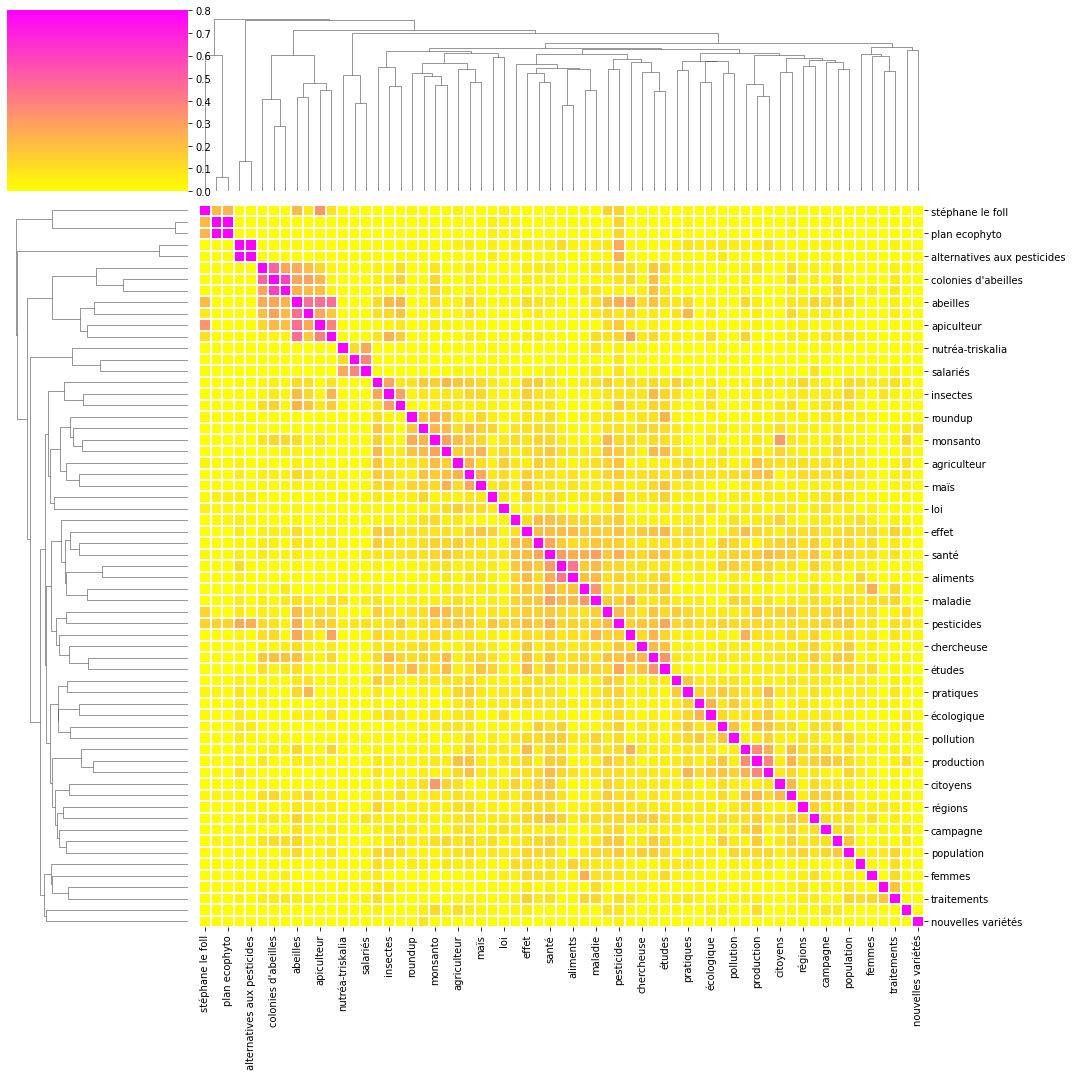

In [4]:
from matplotlib import pyplot as plt


cmap_reversed = plt.cm.get_cmap('spring_r')
ax=sns.clustermap(similarity,figsize=(15,15), cmap = cmap_reversed, linewidths=2, linecolor='white', vmax = 0.8)#,labels=range(14))
new_labels=[]
labels_list=list_name
for l in ax.ax_heatmap.axes.get_xticklabels():
    l.set_text(labels_list[int(l.get_text())])
    new_labels.append(l)
ax.ax_heatmap.axes.set_yticklabels(new_labels,rotation=0)
ax.ax_heatmap.axes.set_xticklabels(new_labels,rotation = 90)


plt.tight_layout()

# Dendogramme

array([ 3,  6,  7,  7,  2,  2,  9,  3,  8,  7,  7,  8,  3,  6,  3,  8,  8,
        8,  1,  7,  8,  4,  9,  6,  6, 10,  5,  6,  7,  6,  7,  6,  3,  9,
        8, 11,  4,  5,  6,  7,  1,  5,  8,  8,  8,  8,  7,  8,  7,  7,  6,
        3,  8,  4,  7,  7,  1,  3,  8,  9,  8,  8,  7], dtype=int32)

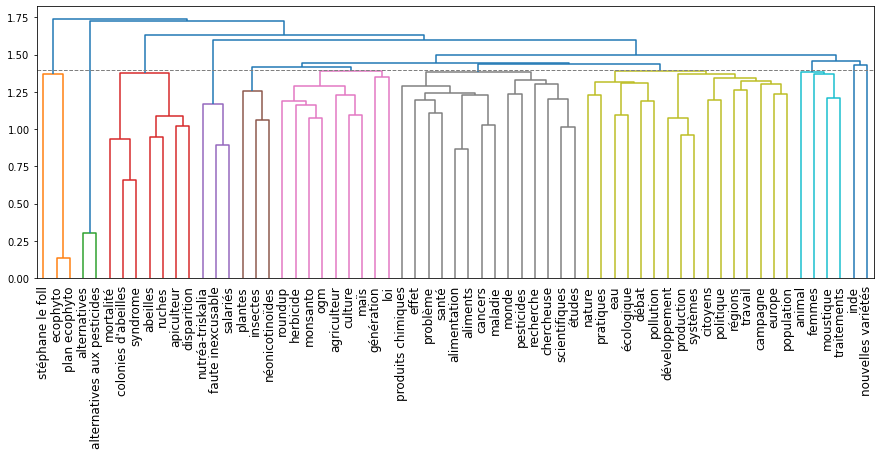

In [7]:
fig = plt.figure(1, figsize=(15, 5))
th = 1.4
row_linkage = hc.linkage(sp.distance.pdist(similarity), method='average')# for x in (t.values, rho_terms.values.T))
dn = hc.dendrogram(row_linkage, leaf_rotation=90, leaf_font_size= 12, labels=list_name, color_threshold= th)
plt.axhline(y=th, c='grey', lw=1, linestyle='dashed')

cluster_idx = scipy.cluster.hierarchy.fcluster(row_linkage,t= th,criterion="distance")
cluster_idx

In [8]:
cluster = [y for y in cluster_idx]
    
new_df = pd.DataFrame(data = {"term": list_name, "cluster": cluster})
new_df.sort_values("cluster", ascending = True)




,term,cluster
18,ecophyto,1
56,stéphane le foll,1
40,plan ecophyto,1
4,alternatives,2
5,alternatives aux pesticides,2
...,...,...
33,moustique,9
59,traitements,9
22,femmes,9
25,inde,10
